<a href="https://colab.research.google.com/github/Jandsy/ml_finance_imperial/blob/main/Programming_Sessions/Programming_session_1/Programming_session_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://drive.google.com/uc?export=view&id=1gmxxmwCR1WXK0IYtNqvE4QXFleznWqQO" height="100"/>

# **<center>Machine Learning and Finance </center>**


## <center> Programming Session 1 - Handling Imbalanced datasets </center>


# Handling Imbalanced Datasets


## Outline

- [Loading and visualizing the data](#Loading-and-visualizing-the-data)
- [Evaluation Metrics](#Evaluation-Metrics)
- [Defining a baseline model](#Defining-a-baseline-model)
- [Improving the model](#Improving-the-model)
- [Optional Part: Optimize AUC](#Optional-Part:Optimize-AUC)

## Introduction

Welcome to our focused session on tackling imbalanced datasets within the finance industry, specifically through the lens of credit card fraud detection. Our aim is to navigate the challenges posed by the rarity of fraudulent transactions compared to legitimate ones, and to develop effective machine learning models for fraud detection.

## The Challenge

Imbalanced datasets, where the classes are not represented equally, pose significant challenges in predictive modeling. This imbalance leads to models that may overlook the minority class—fraudulent transactions in our case. We will address how to mitigate model bias and select appropriate evaluation metrics beyond mere accuracy.

## Dataset Overview

We'll use a credit card fraud detection dataset characterized by:
- Transactions labeled as fraudulent or legitimate.
- Highly imbalanced class distribution.

* The dataset is composed of 10000 rows.
* Each row contains 30 features which are the result of a transformation.
* Each feature vector is associated with a binary target: The target takes value 1 in case of a fraud and 0 otherwise.
* The dataset is highly imbalanced since only 400 samples are associated with a target 1 (fraud).

## Objectives

1. **Understand and Prepare the Data:** Initial data exploration and preprocessing.
2. **Develop a Baseline Model:** To benchmark our improvements.
3. **Implement Imbalance Handling Techniques:** Including resampling and algorithm adjustments.
4. **Evaluate Model Performance:** Using metrics suited for imbalanced data.

By the end of this notebook, students will be adept in applying practical techniques and strategies to manage imbalanced datasets, thereby improving the effectiveness of models in identifying instances of credit card fraud.




# Loading and visualizing the data


---
<font color=green>Q1:</font>
<br><font color='green'>
Import the following modules:
* `pandas` to manipulate dataframes
* `seaborn` for fancy plots
* `matplotlib.pyplot` for plots
* `numpy` to manipulate arrays
</font>

---


---
<font color=green>Q2:</font>
<br><font color='green'>
Load the dataset directly into pandas using the command `pd.read_csv(<paste_the_raw_url_here>, index_col=0)`. Obtain the 'url' by navigating to the GitHub page of the dataset, clicking on the file, and then clicking on "Raw" to access the raw URL.
</font>

---

---
<font color=green>Q3:</font>
<br><font color='green'>
After loading the dataset, use `df.describe()` to obtain a summary of the data. This function provides key insights, including count, mean, standard deviation, min, and max values for numeric columns, helping you understand the dataset's distribution and central tendencies.

</font>

---

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,Class
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,-0.176966,0.133629,-0.257128,0.196890,-0.157788,-0.089717,-0.207248,0.025690,-0.102375,-0.235323,...,-0.012375,-0.019895,0.003877,0.006371,-0.000780,0.006072,0.000549,1.012547,0.105599,0.040000
std,2.529586,2.042182,2.487288,1.731921,1.838658,1.366773,2.201620,1.759967,1.286580,1.813559,...,0.777069,0.804231,0.596144,0.538998,0.484268,0.486474,0.286276,4.769297,0.559309,0.195969
min,-36.802320,-63.344698,-31.103685,-4.675470,-28.815577,-11.481330,-43.557242,-41.044261,-13.434066,-24.588262,...,-10.933144,-32.828995,-2.740677,-8.696627,-2.534330,-7.263482,-5.171480,-0.307413,-0.994901,0.000000
25%,-0.986390,-0.554406,-0.986332,-0.805100,-0.748831,-0.801992,-0.597998,-0.207066,-0.708046,-0.590781,...,-0.546460,-0.166632,-0.345356,-0.307792,-0.325907,-0.070054,-0.053063,-0.237546,-0.368737,0.000000
50%,-0.032616,0.102007,0.142327,0.073566,-0.096294,-0.315278,0.019270,0.027382,-0.074212,-0.125316,...,-0.001869,-0.014560,0.049473,0.029592,-0.053893,0.002781,0.013105,-0.008524,-0.019191,0.000000
75%,1.294138,0.846395,1.005767,0.893287,0.574411,0.339206,0.549792,0.344899,0.577495,0.388590,...,0.514769,0.145128,0.432942,0.357022,0.249321,0.100043,0.084028,0.768532,0.639311,0.000000
max,2.390655,22.057729,3.757300,16.715537,14.927126,21.190194,26.249717,20.007208,9.213023,12.925140,...,8.361985,6.343504,3.695503,2.939972,3.040808,8.104297,5.823423,274.359394,1.034716,1.000000


The DataFrame is composed of 31 columns:
- 30 features correspond to the first 30 dimensions of a transformation applied to the original data.
- The **Class** column serves as the binary target indicator:
  - A target value of 1 indicates a fraudulent transaction.
  - A target value of 0 indicates a legitimate transaction.


---
<font color=green>Q4:</font>
<br><font color='green'>
Utilize `sns.scatterplot()` from the seaborn library to explore the relationships between selected features through scatter plots:
- Plot `feature_4` (x-axis) against `feature_3` (y-axis). Label this plot accordingly.
- Plot `feature_20` (x-axis) against `feature_15` (y-axis). Ensure this plot is also properly labeled.

For each plot, consider using the `hue` parameter to differentiate between classes (Fraud vs. No Fraud) based on the **Class** column. This will enhance the visual analysis, helping to identify if the data points are linearly separable.

Questions for analysis:
- Which of these two scatter plots shows data points that appear to be linearly separable?
- How does the class separation in these plots inform your approach to building a predictive model?
</font>

---

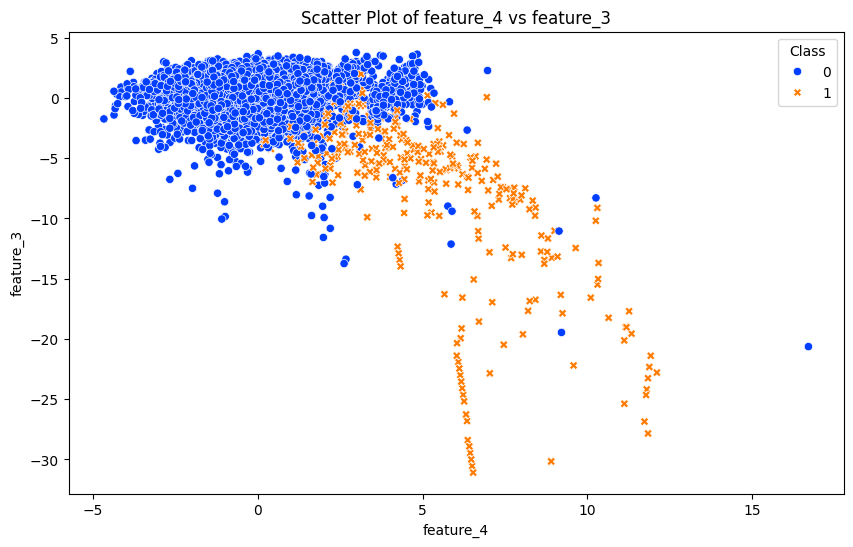

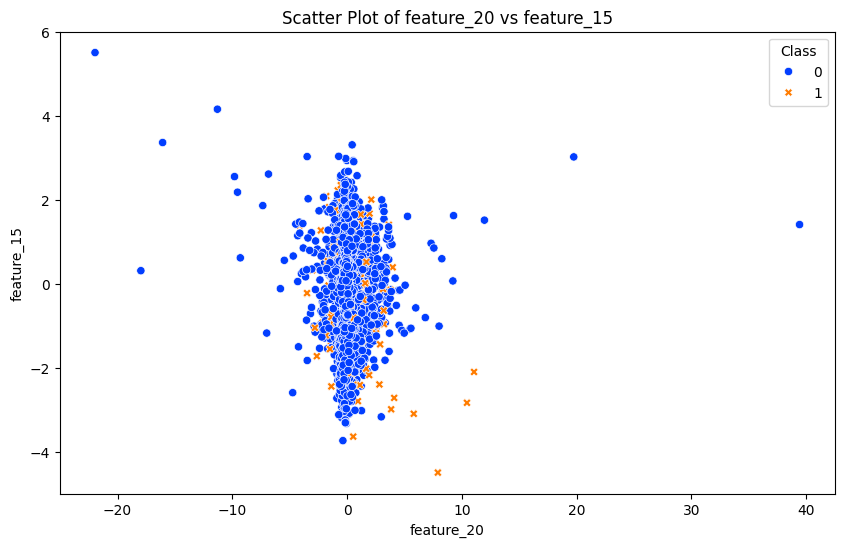

---
<font color=green>Q5:</font>
<br><font color='green'>
Utilize the `sns.countplot` function from the seaborn library to visualize the distribution of the target variable, `Class`, within your dataset. This visualization will allow you to assess the balance between the classes:

- Execute the command `sns.countplot(x='Class', data=df)` to generate the plot. Replace `df` with the name of your DataFrame if it's different.
- Inspect the resulting plot to evaluate the distribution of the target classes.

Questions for analysis:
1. Based on the visualization, does the dataset appear to be balanced with respect to the target classes? Describe the observed class distribution.
2. Considering the class distribution you've observed, discuss whether the accuracy metric would be an appropriate measure of model performance. What challenges might arise from using accuracy in this context?

</font>

---


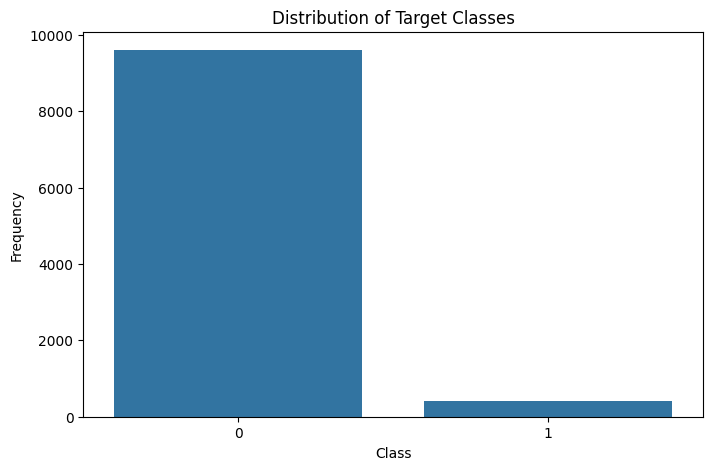

The dataset is highly imbalanced. The accuracy metric is not a good evaluation metric.

# Evaluation Metrics

## The Recall

Let us recall the definition of the confusion matrix:

<center><img width="700" src = "https://drive.google.com/uc?export=view&id=1agZSryLBlfSOeoUGxH0HmIJdroIdM5ZA"></center>

As we want to minimize the type 2 error (which is missing a Fraud), the **recall** is a good evaluation metric.




# Defining a baseline model

### Splitting the dataset into train set and test set

---
<font color=green>Q6:</font>
<br><font color='green'>
Extract the feature matrix `X` and the target vector `Y` from the DataFrame as follows:
- **Feature Matrix (X):** Contains the 30 features from all samples. Use `X = df.iloc[:, :30].values` to extract the features, resulting in a shape of (10000, 30).
- **Target Vector (Y):** Contains the binary target. Extract it with `Y = df['Class'].values`, leading to a shape of (10000, 1).

Verify the shapes with `print("Shape of X:", X.shape)` and `print("Shape of Y:", Y.shape)`.

</font>

---

Shape of X:  (10000, 30)


Shape of Y: (10000,)


---
<font color=green>Q7:</font>
<br><font color='green'>
Split the dataset into training and test sets using `train_test_split` from `sklearn.model_selection`. Allocate 30% of the data for testing:

</font>

---


In [ ]:
# Shape of X_train


In [ ]:
# Shape of y_train


In [ ]:
# Shape of X_test


In [ ]:
# Shape of y_test


### A baseline model

---
<font color=green>Q8:</font>
<br><font color='green'>
Initialize and train a **Logistic Regression** model with the following steps:
1. Import the Logistic Regression classifier from `sklearn.linear_model`.
2. Create an instance of the classifier named `lr`.
3. Fit `lr` to the training data using the `.fit()` method.
</font>

---

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()




The method `lr.predict_proba()` maps each feature vector $x$ to a pair of scores $p(x) = [p\_0, p\_1]$ where $p\_0$ and $p\_1$ represent the model's confidence in assigning the target $y=0$ and $y=1$ to $x$, respectively. For any given $x$, $p\_0 + p\_1 = 1$. The score $p\_1(x) \in [0, 1]$ specifically reflects the confidence of the Logistic Regression classifier in predicting the target $y=1$ for the feature vector $x$.



<center><img width=“500" src = "https://drive.google.com/uc?export=view&id=1znqNbk_1GLWeTgxf3PU0HcGg1r1L-uLo"></center>


To transform the continuous prediction $p(x)$ into a binary prediction $\hat{y} \in \{0, 1\}$, select a **threshold**. If $p(x)$ exceeds this threshold, assign the positive label (1); otherwise, assign the negative label (0).

The default threshold is 0.5. In Logistic Regression, the method `lr.predict()` automatically applies this threshold to map feature vector $x$ to a binary output.


---
<font color=green>Q9:</font>
<br><font color='green'>
Utilize the previously discussed method to compute the binary prediction vector `y_hat` for the test dataset `X_test`, applying the default threshold of 0.5. This can be achieved with the Logistic Regression model's `predict` method:

</font>

---

---
<font color=green>Q10:</font>
<br><font color='green'>
Generate a visual representation of the confusion matrix for the test set predictions using `confusion_matrix` from `sklearn.metrics`. Follow these steps for visualization:

1. Import `confusion_matrix`.
2. Compute the confusion matrix using the true labels and your predictions.
3. Use seaborn  to create a heatmap for easy interpretation.

</font>

---


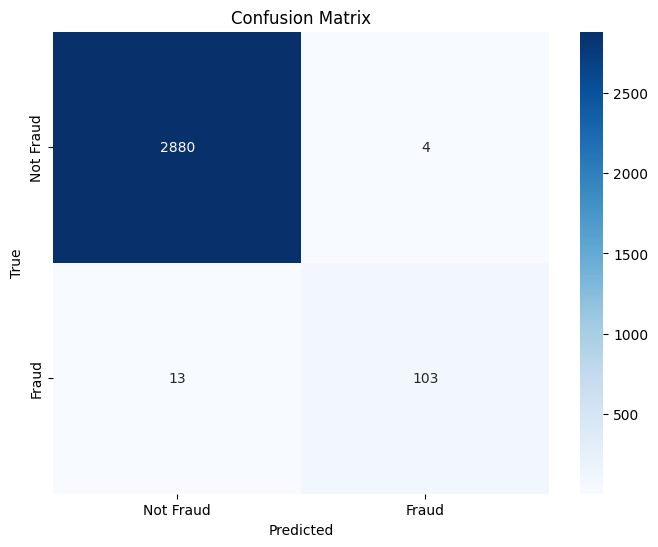

---
<font color=green>Q11:</font>
<br><font color='green'>
Utilize `classification_report` from `sklearn.metrics` to display key classification metrics, including precision, recall, and the F1 score, for your model's performance on the test set. Follow the steps below to generate and view the report:

1. Import the `classification_report` function.
2. Call `classification_report` with the true labels and your predictions.
3. Print the report to view the metrics.

</font>

---

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2884
           1       0.96      0.89      0.92       116

    accuracy                           0.99      3000
   macro avg       0.98      0.94      0.96      3000
weighted avg       0.99      0.99      0.99      3000



While the results from our classification report indicate good overall performance, we observe a lower recall for the minority class. This suggests that our model is less effective at identifying all positive instances of the minority class, which is critical in applications like fraud detection where missing actual fraudulent transactions can have significant consequences.



# Improving the model

### Resampling techniques

* The main problem when we train a model using an imbalanced dataset is that it results in a biased classifier towards the majority class.

* There are two ways to overcome this bias problem:
  * **Undersampling**: In this case, we randomly select as many observations of the majority class $\mathcal{G}_-$ as we have for the minority class $\mathcal{G}_+$. (See figure below)
  
  <center><img width=“500" src = "https://drive.google.com/uc?export=view&id=106_U8l014dk7LybyoPpUEiLlABfeWbhZ"></center>

  * **Oversampling**: In this case, we prefer to have more elements from the minority class $\mathcal{G}_+$. Hence, we either create duplicates of the minority class or create synthetic datapoints so that we reach $|\mathcal{G}_-|$ samples (where $|F|$ denotes the number of elements of $F$). One way of creating synthetic data points is called the **SMOTE** (Synthetic Minority Oversampling Technique). The method is described in [Synthetic Minority Over-sampling Technique](https://arxiv.org/pdf/1106.1813.pdf) and can be summarized as follows:
    * First, a random example $x_1$ is chosed from the minority class $\mathcal{G}_+$.
    * Then, we find the k nearest neighbors for that example (typically $k=5$).
    * We randomly select one of these k neighbors, let's call it $x_2$.
    * The synthetic instances are generated as a convex combination of the two instances $x_1$ and $x_2$.

  <center><img width=“500" src = "https://drive.google.com/uc?export=view&id=1j2EGBKoXKdI66mynmgdIYlRT2HWpdhrQ"></center>


---
<font color=green>Q13:</font>
<br><font color='green'>
Enhance the dataset balance through oversampling of the minority class using the Synthetic Minority Over-sampling Technique (SMOTE). Follow these steps to apply SMOTE from the `imblearn.over_sampling` library and create a new balanced dataset $(X_{\text{smote}}, y_{\text{smote}})$:

1. Import the `SMOTE` function.
2. Apply SMOTE to generate a balanced dataset by oversampling the minority class.
3. Store the newly balanced features and labels in $(X_{\text{smote}}, y_{\text{smote}})$.


</font>

---

In [ ]:

# Now, (X_smote, y_smote) represents your balanced dataset

---
<font color=green>Q14:</font>
<br><font color='green'>
With the dataset balanced using SMOTE, let's proceed with the Logistic Regression model to assess the impact on model performance:

1. **Retrain the Logistic Regression Model:** Utilize the newly balanced training dataset $(X_{\text{smote}}, y_{\text{smote}})$ to train the model.

2. **Make Predictions:** Use the retrained model to predict the targets for `X_test`.

3. **Visualize the Confusion Matrix:** Plot the confusion matrix to visually assess the model's performance on the test set.

4. **Evaluate Model Performance:** Compute key evaluation metrics, such as precision, recall, and F1 score, to determine if balancing the dataset has led to any improvements.


</font>

---

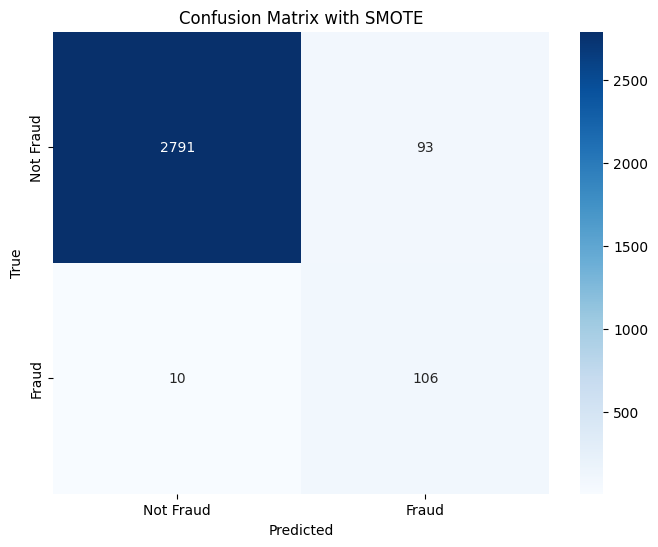

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      2884
           1       0.53      0.91      0.67       116

    accuracy                           0.97      3000
   macro avg       0.76      0.94      0.83      3000
weighted avg       0.98      0.97      0.97      3000



After applying the SMOTE technique to balance our dataset and retraining the Logistic Regression model, we observe a slight improvement in recall for the minority class. This enhancement is particularly beneficial for banking applications, where accurately identifying fraudulent transactions—even at the expense of a higher false positive rate—can significantly reduce financial losses and enhance customer trust.
on the accuracy of minority class detection.

#Optional Part: Optimize AUC



As explained in Lecture 1, the AUC is defined as the area under the curve, i.e, the area between the curve and the x-axis.

* Let us consider a dataset $\mathcal{S} = \{ (x_1, y_1), \dots, (x_n, y_n) \}$ where $\forall i \in \{1, \dots, n\} \quad x_i \in \mathbb{R}^d, \ y_i \in \{0, 1\} \}$

* A classification algorithm (like Random Forest), trained on $\mathcal{S}$, maps each new obersvation $x^* \in \mathbb{R}^d$ to a score $\hat{p}(x^*) \in [0, 1]$ signifying the algorithm's confidence that the label of $x^*$ is $y^* = 1$.


* Let us split the training feature vectors  $\{(x_i)\}_{1 \leq i \leq n}$ into two groups:
  * A group $\mathcal{G}_+$ of feature vectors associated with the positive label.  
  * A group $\mathcal{G}_-$ of feature vectors associated with the negative label.

* We can then represent two distribution of scores:
  * A distribution of the scores $\hat{p}(x)$ for each $x \in \mathcal{G}_+$
  * A distribution of the scores $\hat{p}(x)$ for each $x \in \mathcal{G}_-$

* The figure below summarizes the process described.

<center><img width="700" src = "https://drive.google.com/uc?export=view&id=17AynSe1QDaiZR-_9FpVQMfOzKRdR_Lfi"></center>

* Let us represent the two distributions in one figure:

<center><img width="700" src = "https://drive.google.com/uc?export=view&id=1tKSqfs1ITKikr8F4oaRSs6t2HLN0hIIf"></center>


* The **AUC** can be interpreted as a measure of the quality of seperation between the aforementioned distributions.

* Mathematically speaking, the **AUC** gives the probability that the classifier gives a higher score to a positive sample than to a negative sample. (you can read the proof in the [optional reading](https://colab.research.google.com/drive/1gcbB3-3Y6AfohDFJYKmFPF2G-4EIPDTi?usp=sharing)).

### Adjusting the probability threshold

---
<font color=green>Q14:</font>
<br><font color='green'>
To visualize the model's performance through the Receiver Operating Characteristic (ROC) curve, we'll employ the `BinaryClassification` class from `plot_metric.functions`. This approach provides an intuitive and informative plot of the true positive rate against the false positive rate at various threshold settings, highlighting the trade-offs between sensitivity and specificity.

1. Ensure you have `plot_metric` installed. If not, you can install it using pip:
   ```bash
   pip install plot_metric
   
2. Import BinaryClassification and plot the ROC curve for your model's predictions.

</font>

---


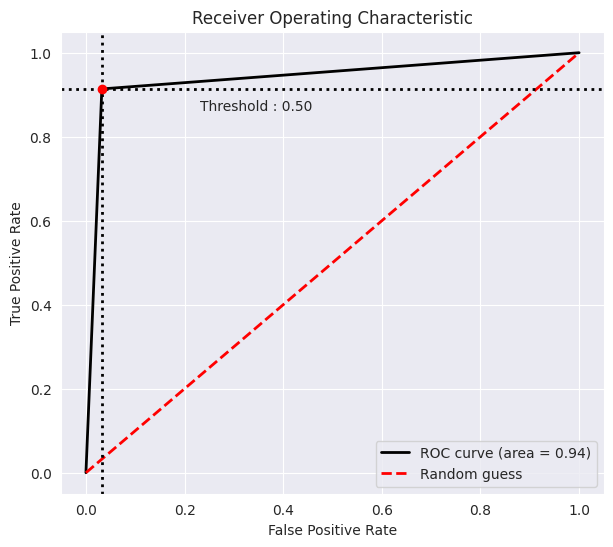

---
<font color=green>Q16:</font>
<br><font color='green'>
Let us fix an objective recall of 0.9. By decreasing the threshold progressively from 1 to 0, determine the maximum threshold for which we can have a recall of 0.9, called `best_threshold`
</font>

---


The best Threshold is 0.7100000000000001...The best recall is 0.9051724137931034


---
<font color=green>Q17:</font>
<br><font color='green'>
Plot the ROC curve and show the point with the coordinated (FPR(best_threshold), TPR(best_treshold)).
</font>

---

In [ ]:
# let's use another probability threshold so that we can get to the elbow position in the above curve


---
<font color=green>Q18:</font>
<br><font color='green'>
* Plot the confusion matrix associated with `best_threshold`
* Print the evaluation metrics associated with `best_threshold`
</font>

---


In [ ]:
# Calculate the prediction scores y_hat_proba associated with X_test


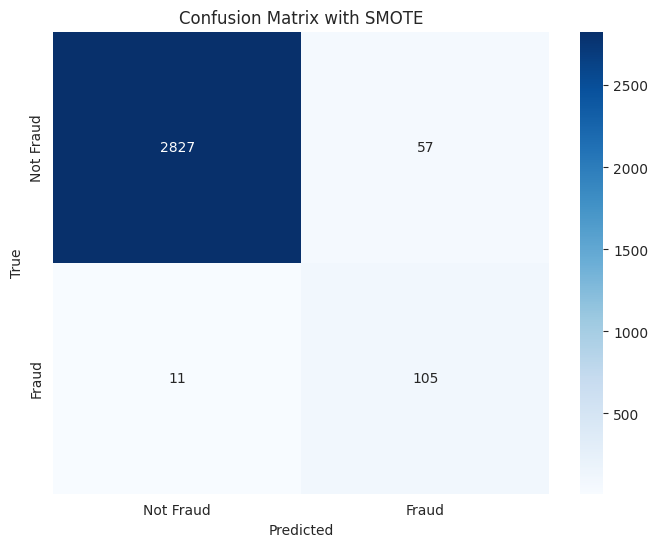

In [ ]:
# Calculate the binary prediction y_hat associated with the threshold th
# Predict on test set


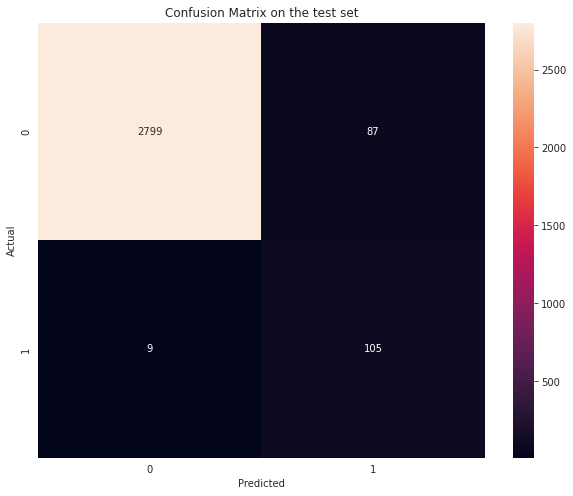

In [ ]:
# plot the confusion matrix


In [ ]:
# print the classification report


              precision    recall  f1-score   support

           0       1.00      0.97      0.98      2886
           1       0.55      0.92      0.69       114

    accuracy                           0.97      3000
   macro avg       0.77      0.95      0.83      3000
weighted avg       0.98      0.97      0.97      3000



# Wrap-up

During this session we learned:
* How to load and explore a dataframe.
* What are the most suitable evaluation metrics in the case of an imbalanced dataset, especially the recall and the AUC.
* Resampling techniques including the SMOTE method.
* How to adjust the probability threshold so that it matches the objective error of a business problem.